<a href="https://colab.research.google.com/github/jhaRahul2102/Accident-severity/blob/main/Accident_Severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier


sns.set_style('darkgrid')
data=pd.set_option('display.max_columns',50)

In [ ]:
data=pd.read_csv('/content/RTA Dataset (2).csv')

**Shape of the dataset:-**

In [ ]:
print('Shape of the dataset:-',data.shape)

Shape of the dataset:- (12316, 32)


**First few rows:-**

In [ ]:
data.head(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury


**Data Types of each columns:-**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

**Statistical description of dataset of dataset:-**

In [ ]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


**Changing time object to data time object:-**

In [ ]:
data['Time']=pd.to_datetime(data['Time'])

In [ ]:
data['month']=data['Time'].dt.month_name()
data['hour']=data['Time'].dt.hour

**Categorical description of data**

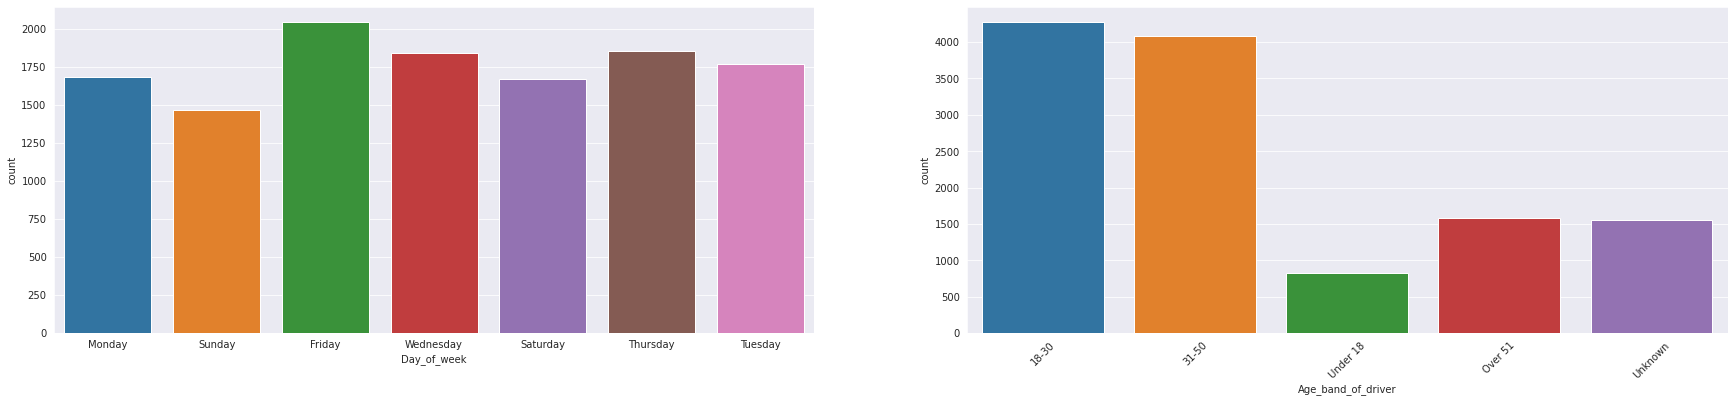

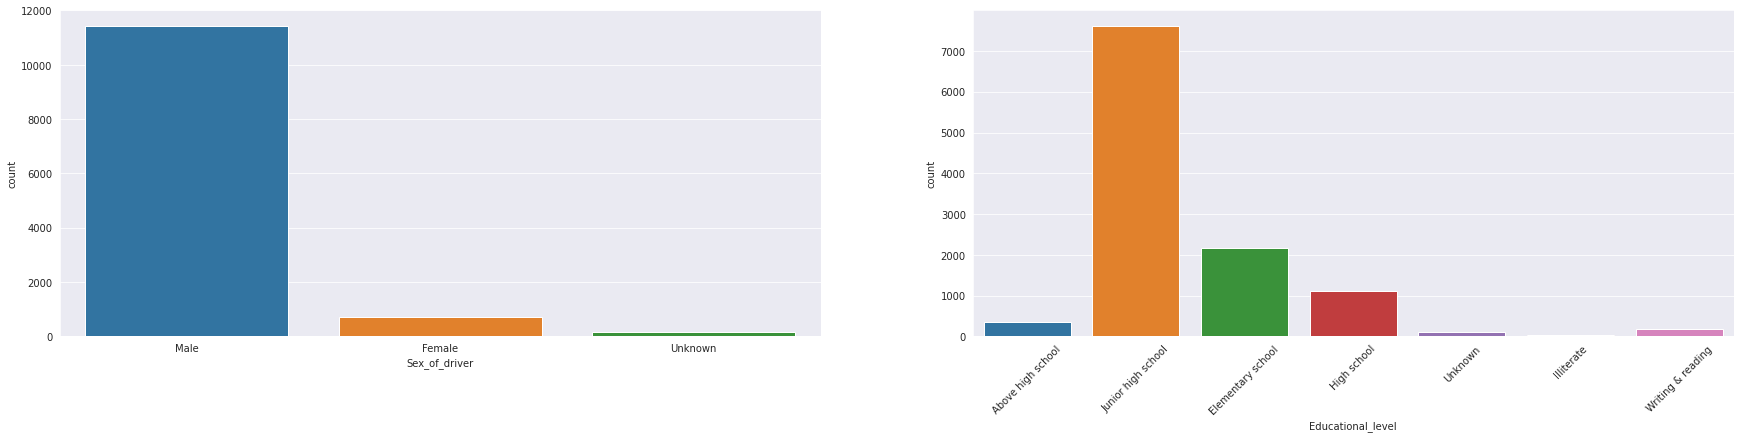

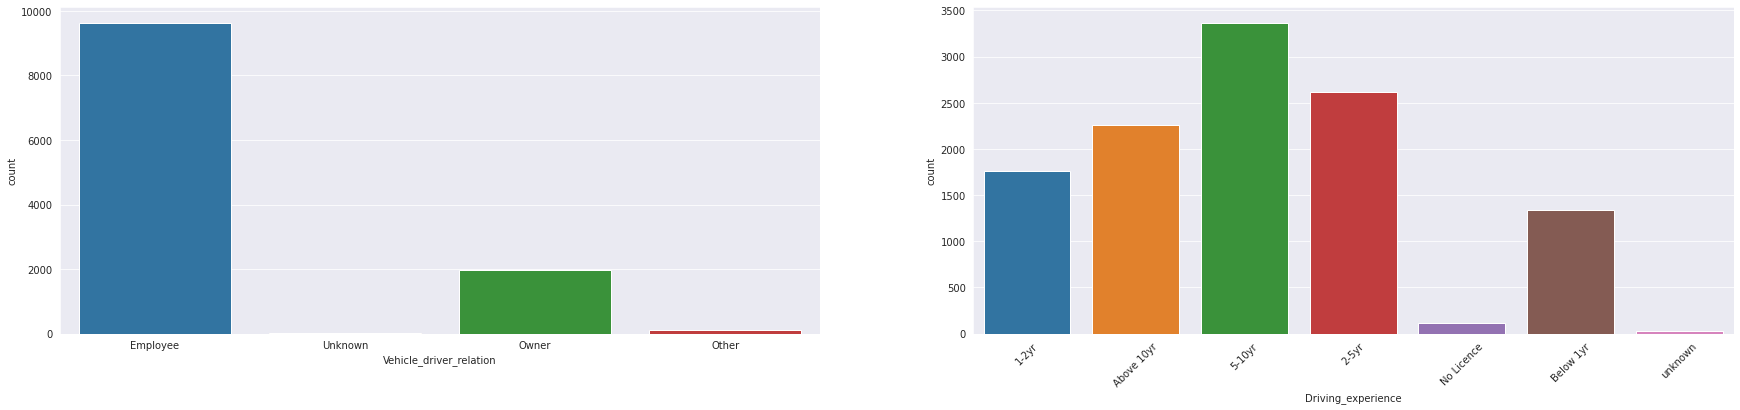

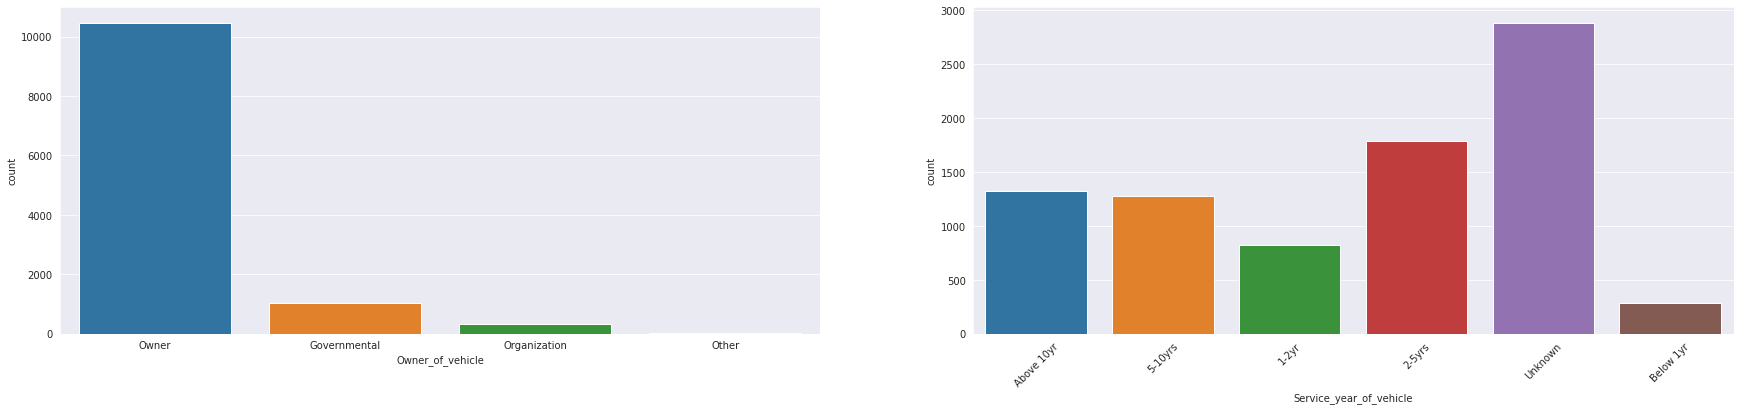

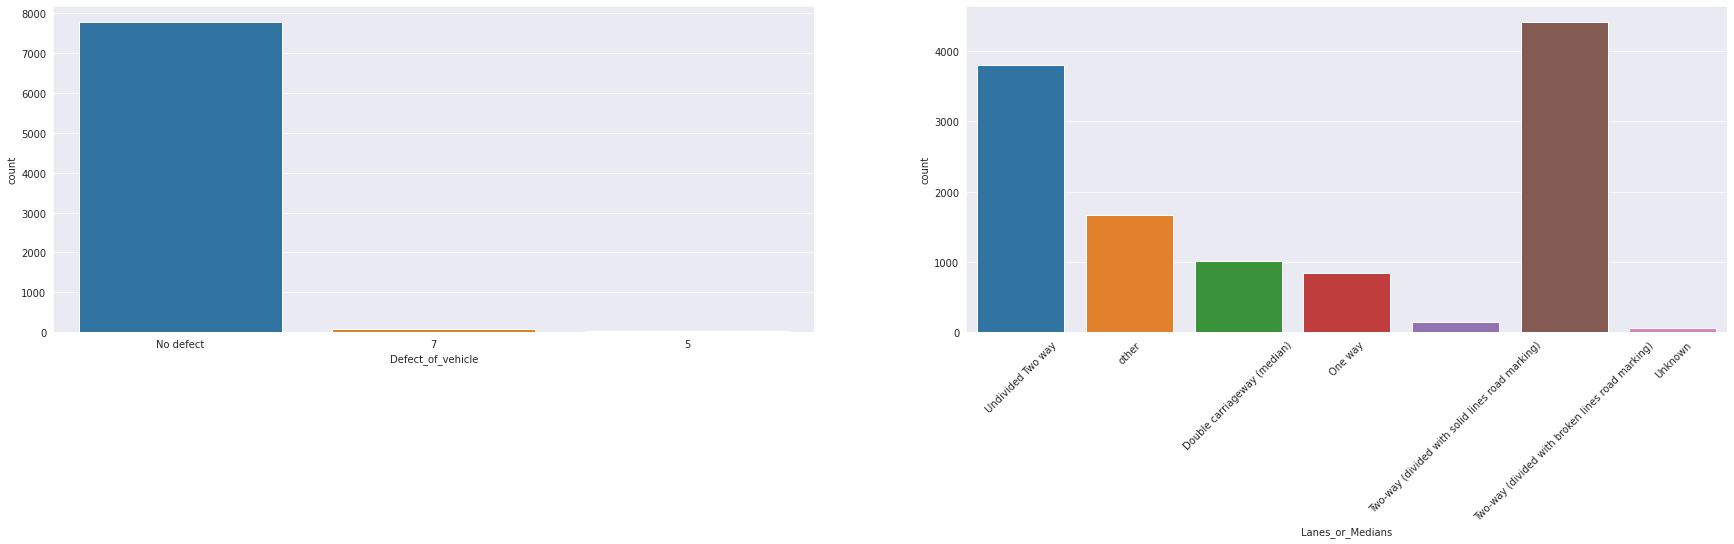

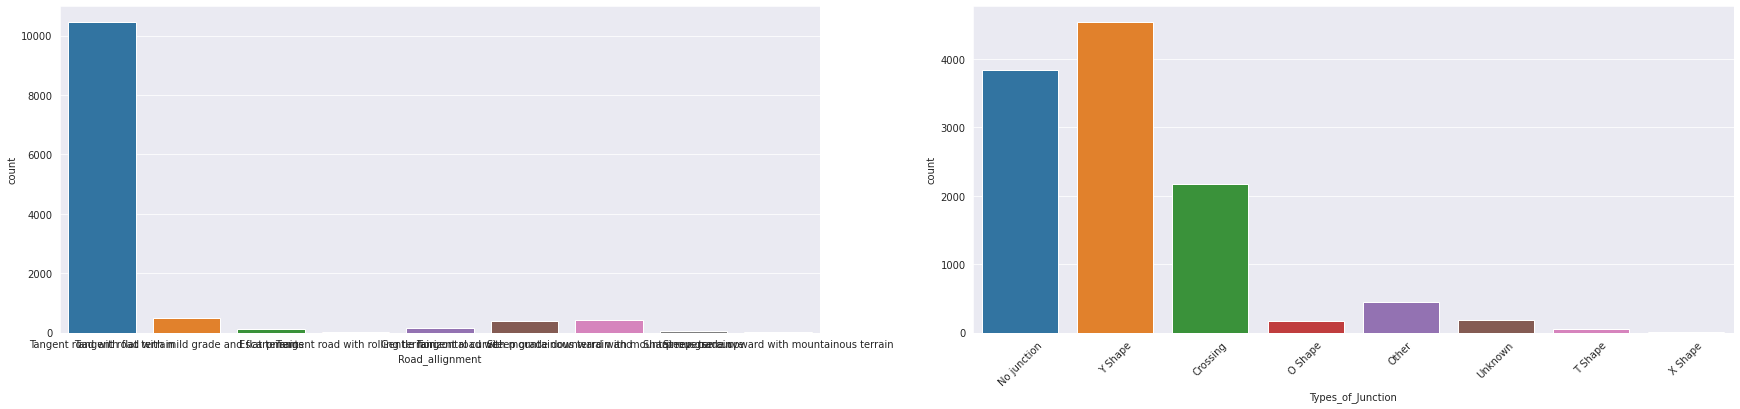

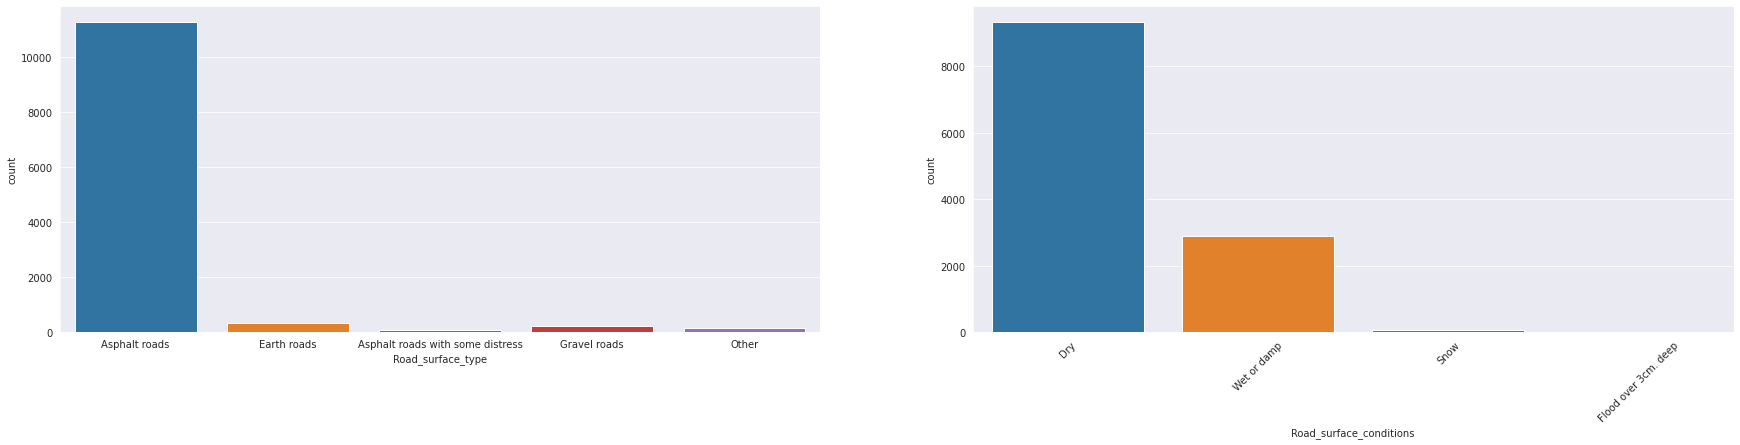

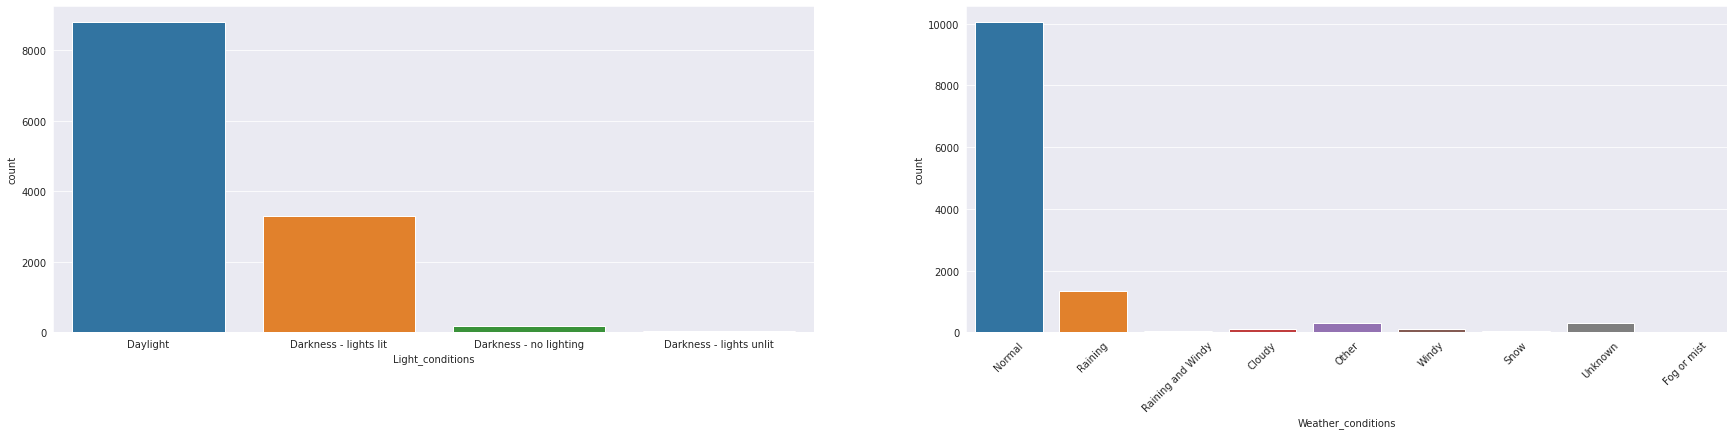

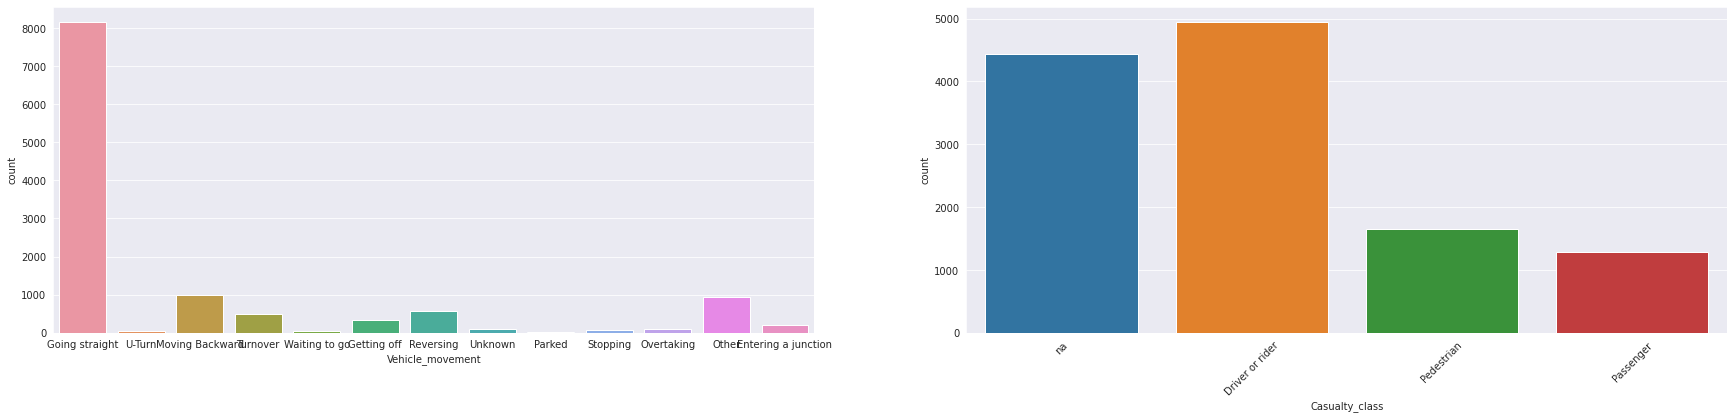

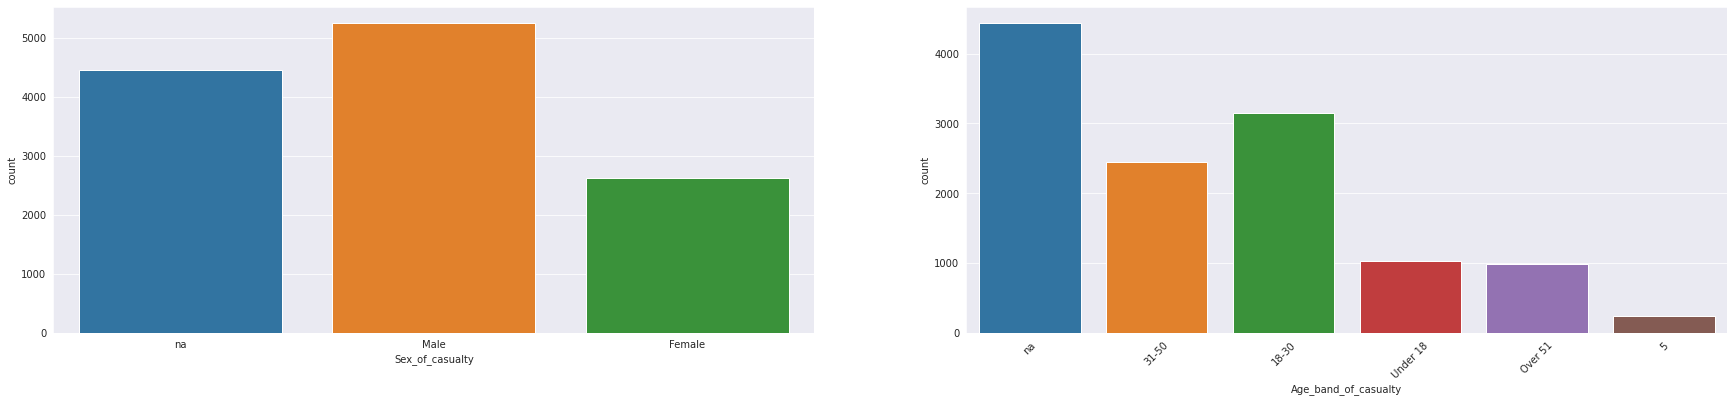

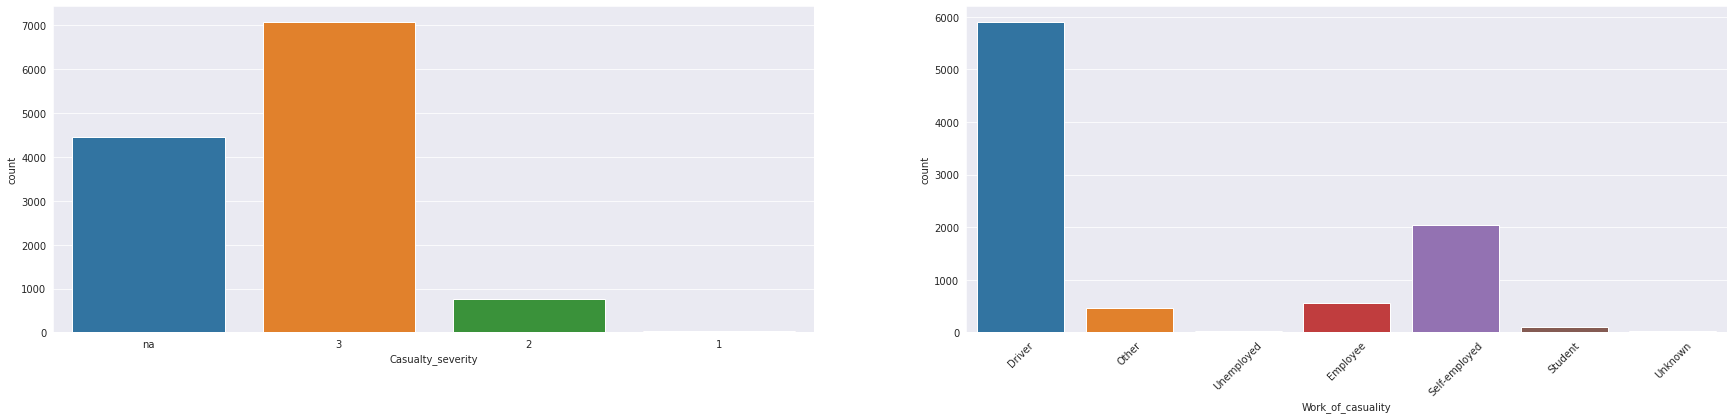

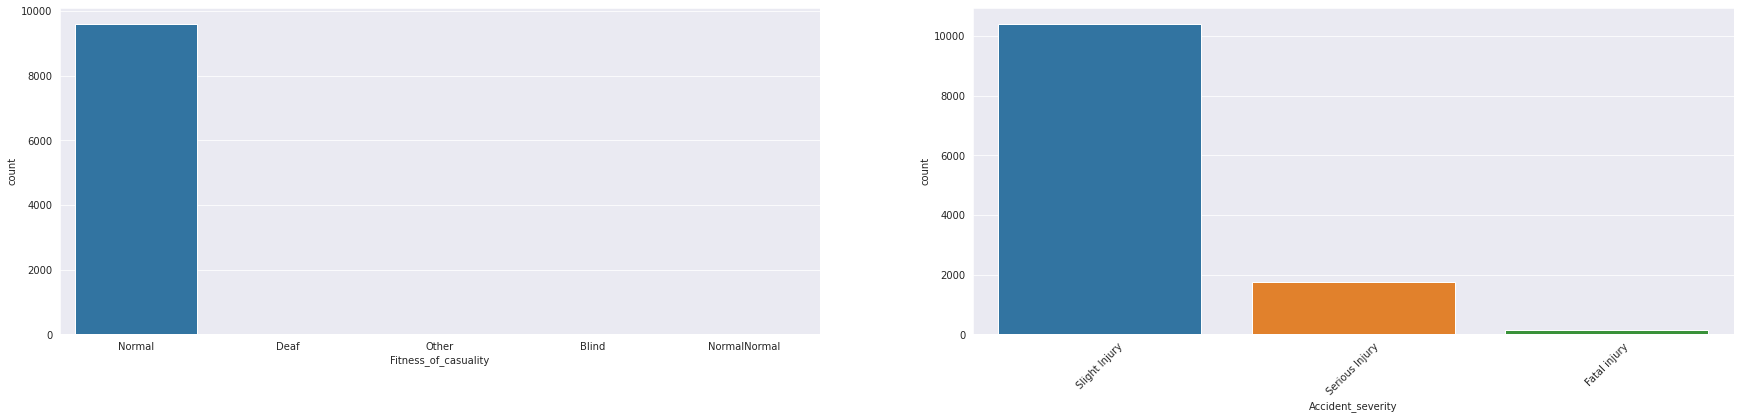

In [ ]:
cat=data.drop(['Pedestrian_movement','Cause_of_accident','Type_of_collision','Type_of_vehicle','Area_accident_occured','Type_of_vehicle'],axis=1).select_dtypes(include='object').columns

for i in range(0,len(cat)-1,2):
  fig,ax=plt.subplots(1,2,figsize=(30,6))
  sns.countplot(x=cat[i],data=data,ax=ax[0])
  sns.countplot(x=cat[i+1],data=data,ax=ax[1])
  plt.xticks(rotation=45)
  
  plt.show()

**Dropping columns with single value:-**

In [ ]:
data.drop(['Time','Fitness_of_casuality','Weather_conditions','Defect_of_vehicle','Owner_of_vehicle','Road_allignment','Road_surface_type','Road_allignment','Pedestrian_movement'],axis=1,inplace=True)

**Replacing unknown with null values**

In [ ]:
data=data.replace(['na','unknown','Unknown'],np.nan)

In [ ]:
a=data['Type_of_vehicle'].replace(['Lorry (41?100Q)','Pick up upto 10Q','Lorry (11?40Q)','Long lorry'],'Private')
a=a.replace(['Public (12 seats)','Public (13?45 seats)','Public (> 45 seats)','Taxi','Ridden horse'],'Public')
data['vehicle_type']=a.replace(['Bicycle','Bajaj','Turbo','Stationwagen','Motorcycle'],'Personal')

**Deriving time zone**

In [ ]:
def time_of_accident(reg):
  a=''
  if(reg>=1 and reg<=5):
    a='midnight'
  elif(reg<=11):
    a='morning'
  elif(reg<=17):
    a='afternoon'
  elif(reg<=21):
    a='evening'
  else:
    a='night'
  return a
data['time']=data['hour'].map(time_of_accident)
data.drop(['hour','Sex_of_driver'],axis=1,inplace=True)

**Label Encoding**

In [ ]:
column=data.loc[:,data.isnull().sum()>0].columns
for col in column:
  data[col]=data[col].replace(np.nan,'0')
  encode=LabelEncoder()
  ab=encode.fit_transform(data[col])+1
  data[col]=ab-1
  data[col]=data[col].replace(0,np.nan)

col=data.select_dtypes(include='object').columns
for i in col:
  encode=LabelEncoder()
  data[i]=encode.fit_transform(data[i])

In [ ]:
# Percentage contribution of mising values

(data.loc[:,data.isnull().sum()>0].isnull().sum()/len(data)*100)

Age_band_of_driver         12.569016
Educational_level           6.828516
Vehicle_driver_relation     4.814875
Driving_experience          6.999026
Type_of_vehicle             7.713543
Service_year_of_vehicle    55.302046
Area_accident_occured       0.511530
Lanes_or_Medians            3.588828
Types_of_Junction           8.752842
Type_of_collision           1.372199
Vehicle_movement            3.215330
Casualty_class             36.075024
Sex_of_casualty            36.075024
Age_band_of_casualty       36.075024
Casualty_severity          36.075024
Work_of_casuality          26.120494
Cause_of_accident           0.202988
vehicle_type                7.713543
dtype: float64

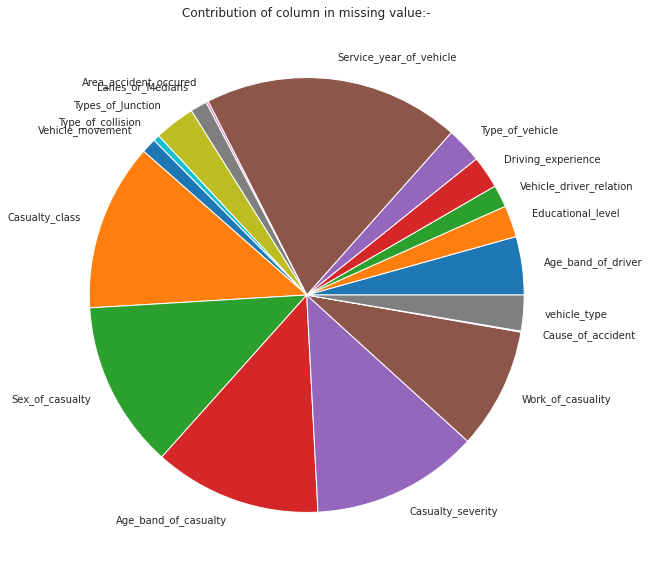

In [ ]:
data=data.replace(['na','Unknown','unknown'],np.nan)

col=data.loc[:,data.isnull().sum()>0].columns
score=list(data.loc[:,data.isnull().sum()>0].isnull().sum()/len(data)*360)

plt.figure(figsize=(15,10))
plt.pie(x=score,labels=col)
plt.title('Contribution of column in missing value:-')
plt.show()


In [ ]:
one_hot_encode=['Sex_of_casualty','Educational_level','Types_of_Junction','Road_surface_conditions','Light_conditions','Vehicle_movement','time','vehicle_type']
data=pd.get_dummies(data,columns=one_hot_encode,drop_first=True)

**Imputing the null values:-**

In [ ]:
impute=KNNImputer()
data=pd.DataFrame(impute.fit_transform(data),columns=data.columns)

In [ ]:
x=data.drop('Accident_severity',axis=1)
y=data['Accident_severity']

**Handling imbalance dataset:-**

In [ ]:
over = SMOTE(sampling_strategy = {2:12000, 1:13000, 0:13000})
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

**Modelling**

In [ ]:
models=[]
models.append(('Logistic Regression',LogisticRegression(solver='lbfgs')))
models.append(('Gradient Boosting ',GradientBoostingClassifier()))
models.append(('Random Boosting ',RandomForestClassifier()))
models.append(('Decison ',DecisionTreeClassifier()))
models.append(('XGB',XGBClassifier()))

**Custom metrics for dataset:-**

In [ ]:
scoring = {
           'precision':make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'log_loss': 'neg_log_loss'
           }
def average_score_on_cross_val_classification(model, X, y, scoring=scoring, cv=cv):
    scores_dict = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    return {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}

In [ ]:
for name,model in models:
  print(name,average_score_on_cross_val_classification(model, x, y, scoring=scoring, cv=cv))

Logistic Regression {'fit_time': 1.12578, 'score_time': 0.0197, 'test_precision': 0.77668, 'test_recall': 0.846, 'test_f1': 0.77593, 'test_log_loss': -0.46531}
Gradient Boosting  {'fit_time': 9.67861, 'score_time': 0.04017, 'test_precision': 0.81777, 'test_recall': 0.84844, 'test_f1': 0.78653, 'test_log_loss': -0.44298}
Random Boosting  {'fit_time': 2.19484, 'score_time': 0.15823, 'test_precision': 0.83545, 'test_recall': 0.84708, 'test_f1': 0.7788, 'test_log_loss': -0.50528}
Decison  {'fit_time': 0.16743, 'score_time': 0.02101, 'test_precision': 0.76106, 'test_recall': 0.74575, 'test_f1': 0.75298, 'test_log_loss': -8.78148}
XGB {'fit_time': 6.45426, 'score_time': 0.05104, 'test_precision': 0.81688, 'test_recall': 0.84838, 'test_f1': 0.78425, 'test_log_loss': -0.44286}


**Since accident severity is a dangerous so we focus more on recall than precision:-**
* **And XGBOOST has the highest recall values:-**

In [ ]:
grid={}
grid['n_estimators']=[10,50,100,500]
grid['learning_rate']=[0.001,0.01,0.1,1]
grid['max_depth']=[1,2,3,4,5,6,7,8]

param=GridSearchCV(XGBClassifier(),param_grid=grid,cv=10,scoring='r2',verbose=3)
param.fit(x,y)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV 1/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.169 total time=   0.3s
[CV 2/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.169 total time=   0.2s
[CV 3/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.169 total time=   0.3s
[CV 4/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.169 total time=   0.2s
[CV 5/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.169 total time=   0.2s
[CV 6/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.170 total time=   0.2s
[CV 7/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.170 total time=   0.3s
[CV 8/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.170 total time=   0.2s
[CV 9/10] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=-0.169 total time=   0.2s
[CV 10/10] END learning_rate=0.001, max_depth=1, n_es

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV